# The Keras Blog
## Building Autoencoders in Keras

### Simple Autoencoder

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


In [9]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.3597 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2642 - val_loss: 0.2535
Epoch 3/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2428 - val_loss: 0.2300
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2222 - val_loss: 0.2123
Epoch 5/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2072 - val_loss: 0.1997
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1958 - val_loss: 0.1896
Epoch 7/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1868 - val_loss: 0.1817
Epoch 8/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1797 - val_loss: 0.1752
Epoch 9/50
60000/60000 [==============================] - 3s 5

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

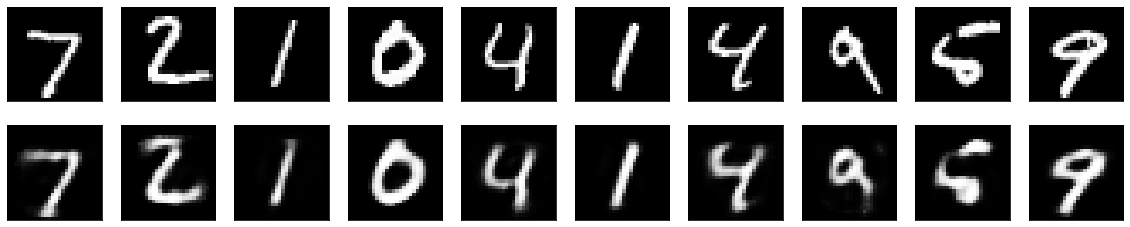

In [16]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Sparse Autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))

In [3]:
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-6))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
autoencoder = Model(input_img, decoded)

In [8]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist
import numpy as np

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train)), np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('x_train.shape: {}'.format(x_train.shape))
print('x_test.shape: {}'.format(x_test.shape))

x_train.shape: (60000, 784)
x_test.shape: (10000, 784)


In [12]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.3757 - val_loss: 0.2877
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2821 - val_loss: 0.2747
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2677 - val_loss: 0.2595
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2537 - val_loss: 0.2455
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2400 - val_loss: 0.2316
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.2273 - val_loss: 0.2199
Epoch 7/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2170 - val_loss: 0.2109
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2092 - val_loss: 0.2043
Epoch 9/50
60000/60000 [==============================] - 3s 5

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print('encoded_imgs.mean(): {}'.format(encoded_imgs.mean()))
print('decoded_imgs.mean(): {}'.format(decoded_imgs.mean()))

encoded_imgs.mean(): 1.7771519422531128
decoded_imgs.mean(): 0.1332922875881195


In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

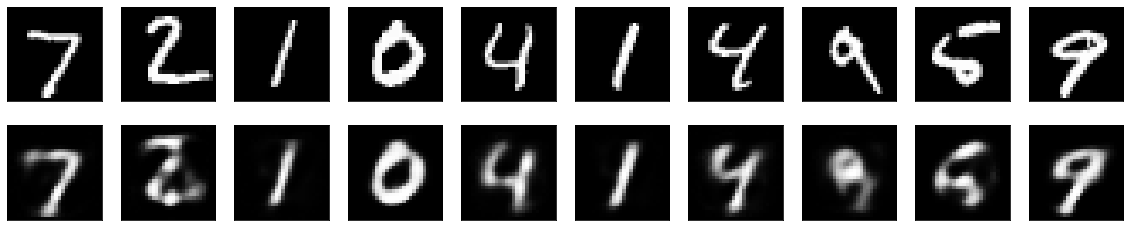

In [17]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()